In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [19]:
mall=pd.read_csv('Mall_Customers.csv')

In [20]:
mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
data=mall.iloc[:,[3,4]].values

In [22]:
from sklearn.cluster import KMeans

In [23]:
elb=[]
for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit(data)
    elb.append(km.inertia_)

In [24]:
elb

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37271.8862365895,
 30227.606513152015,
 24986.52564064288,
 21900.341350107527,
 19787.670554966855,
 17511.7418692661,
 16300.366601949749,
 14292.543823365124,
 13097.028802295266,
 11709.084080050385,
 11307.218779749663,
 10240.270773259137,
 9472.449179986681,
 9124.74333870464]

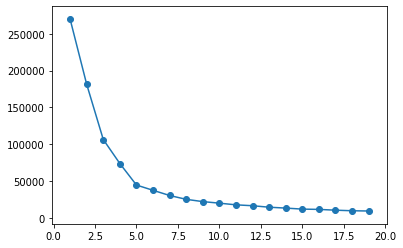

In [25]:
plt.plot(range(1,20),elb)
plt.scatter(range(1,20),elb)

In [26]:
fkm=KMeans(n_clusters=5)
fkm.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
fkm.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [28]:
pr=fkm.predict(data)
pr

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

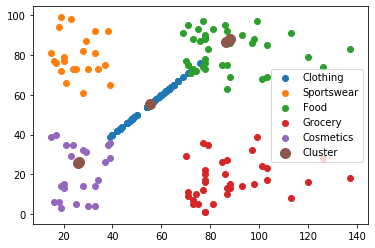

In [29]:
plt.scatter(data[pr==0,0],data[pr==0,0],label='Clothing')
plt.scatter(data[pr==1,0],data[pr==1,1],label='Sportswear')
plt.scatter(data[pr==2,0],data[pr==2,1],label='Food')
plt.scatter(data[pr==3,0],data[pr==3,1],label='Grocery')
plt.scatter(data[pr==4,0],data[pr==4,1],label='Cosmetics')
plt.scatter(fkm.cluster_centers_[:,0],fkm.cluster_centers_[:,0],label="Cluster",s=100)
plt.legend()
